Building K Nearest Regression Model

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.externals.joblib import dump,load
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV as GSCV

%matplotlib inline

Load Dataset

In [2]:
ML_dataset = pd.read_csv("data\ML_dataset.csv")

Begin Model Building and Fitting

Input and Output

In [3]:
Labels = ML_dataset.drop("brand_percent_spending", axis=1).columns.tolist() #columns of drugs
print(Labels)

['specialty_description', 'nppes_provider_city', 'total_claim_count', 'total_drug_cost', 'total_day_supply', 'total_30_day_fill_count', 'bene_count']


In [4]:
X = ML_dataset[Labels]
y = ML_dataset["brand_percent_spending"]
# Seperate into attributes and Labels

PCA feature Selection with Scaling

In [5]:
X = StandardScaler().fit_transform(X)

C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [6]:
PCA = PCA(n_components = 'mle')
X=PCA.fit_transform(X)

In [7]:
print(PCA.explained_variance_ratio_) 

[0.56906204 0.15995163 0.13578093 0.07378827 0.05048682 0.01045913]


Split Data into test and train

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
#Split into Test and Train

Fit Data into K Nearest with GridSearch Cross Validation

In [9]:
best_model = load("Model_Weights\KNear\KNear_best_model")

In [10]:
KNR = best_model
KNR.fit(X_train, y_train)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=20, p=2,
          weights='distance')

Observe CV Results

Predictions

In [11]:
#predictions
y_pred =KNR.predict(X_test)

In [12]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.head(25) #Actual Vs Predicted Dataframebb

,Actual,Predicted
267629,0.785170,0.777960
124417,0.678723,0.619790
358048,0.747042,0.853699
218984,0.707673,0.702693
197858,0.479049,0.493049
456776,0.854644,0.673400
501805,0.569379,0.525537
81835,0.774723,0.799636
501087,0.070524,0.406594
206751,0.551468,0.569429


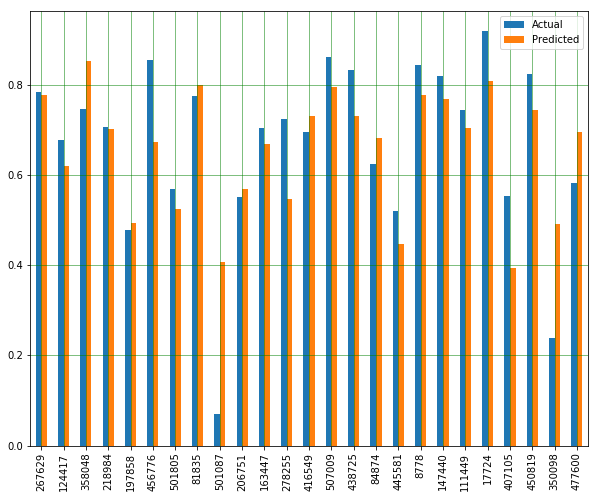

In [13]:
comparison_df.iloc[0:25].plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Text(0, 0.5, 'Predicted')

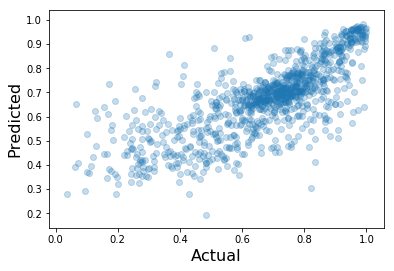

In [14]:
plt.scatter(comparison_df.iloc[0:1000]["Actual"], comparison_df.iloc[0:1000]["Predicted"], alpha = .25)
plt.xlabel("Actual", fontsize = 16) #scatter plot of specialty combined data
plt.ylabel("Predicted",  fontsize = 16)

Statistics

In [15]:
print("r Squared:", metrics.r2_score(y_test, y_pred))
rsq = metrics.r2_score(y_test, y_pred)

r Squared: 0.5518134258890026


In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
mse = metrics.mean_squared_error(y_test, y_pred)

Mean Absolute Error: 0.0944475123582436
Mean Squared Error: 0.018347031931874383


In [17]:
metrics_df = pd.read_csv("data\metrics_df.csv")
metrics_df = metrics_df.append({"Input": Labels, "R Squared": rsq, "Mean Absolute Error": mae, "Mean Squared Error": mse, "Model": "K Nearest"}, ignore_index=True)

In [18]:
metrics_df.tail()

,Input,R Squared,Mean Absolute Error,Mean Squared Error,Model
36,"['specialty_description', 'nppes_provider_city...",0.570916,0.095623,0.017558,Neural Network
37,"['specialty_description', 'nppes_provider_city...",0.615159,0.088794,0.015720,Neural Network
38,"['specialty_description', 'nppes_provider_city...",0.549090,0.093914,0.018368,K Nearest
39,"['specialty_description', 'nppes_provider_city...",0.552332,0.094006,0.018182,K Nearest
40,"[specialty_description, nppes_provider_city, t...",0.551813,0.094448,0.018347,K Nearest


In [19]:
metrics_df.to_csv("data\metrics_df.csv", index = False)

Save Trained Model

In [20]:
dump(KNR, "Model_Weights\KNear\KNear_trainedModel") 

['Model_Weights\\KNear\\KNear_trainedModel']